In [1]:
#No practice in section 15.1, just reading.  
#This section talks about sklearn which packages machine-learning algorithms as estimators.  
#Types of machine learning include supervised (labeled data) and unsupervised (unlabeled data)
#Supervised have two categories classification and regression
#Classification works with discrete classes whicle regression works with continuous outputs
#Steps in a typical data science study include loading a dataset, exploring the data with pandas, transforming data, splitting data
#creating a model, training and testing the model, tuning the model and evaluating accuracy, and making predictions


In [2]:
#15.2 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 1
#Our goal here is to predict what handwritten digit the image represents.  This is a multi-classification problem because there are ten possible outcomes

#Loading the dataset

from sklearn.datasets import load_digits

digits = load_digits()



In [3]:
#A description of the dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
#Displaying the target value for every 100th sample of data out of 1797 samples of data
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [5]:
#The data arrays shape.  1797 rows and 64 columns of data
digits.data.shape

(1797, 64)

In [6]:
# This is the number of target values in the data
digits.target.shape

(1797,)

In [7]:
#This array represent the sample image at index 13
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [8]:
#flattening the data into a one dimensional array
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [9]:
#self check 15.2.2
#Displaying the 8-by-8 image data and the numeric value of the digit the image represents at index 22

digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [10]:
digits.target[22]

2

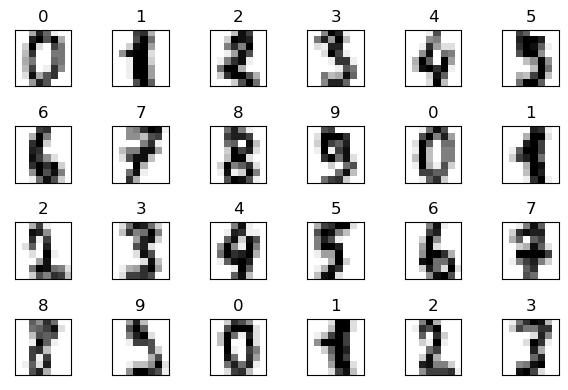

In [12]:
#15.2.3 Visualizing the data
#Displaying the first 24 images in digits

#creating the diagram

import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

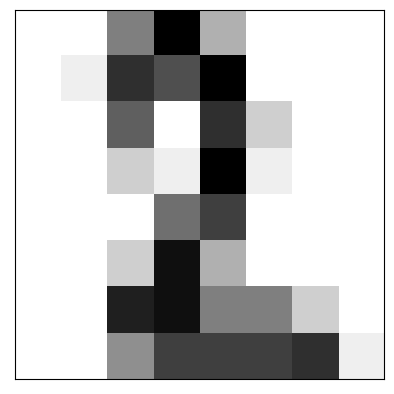

In [13]:
#Displaying the image for the sample number 22 of the Digits dataset

axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])

In [15]:
#Training and testing the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

X_train.shape

(1347, 64)

In [16]:
#75 percent of the data is for training and 25 percent for testing by default
X_test.shape

(450, 64)

In [17]:
#creating the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [18]:
#Training the model
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [19]:
#Predicting
predicted = knn.predict(X=X_test)
expected = y_test
predicted[:20]
#predicted digits for the first 20 samples

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [20]:
#expected values for the first 20 samples
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [21]:
#finding where the predicted and expected values don't match
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [22]:
#15.3 Case study part 2
#Modeling accuracy
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [23]:
#Checking accuracy by a confusion matrix
#explanation on page 613
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

In [24]:
#Classification report explanation on page 614
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



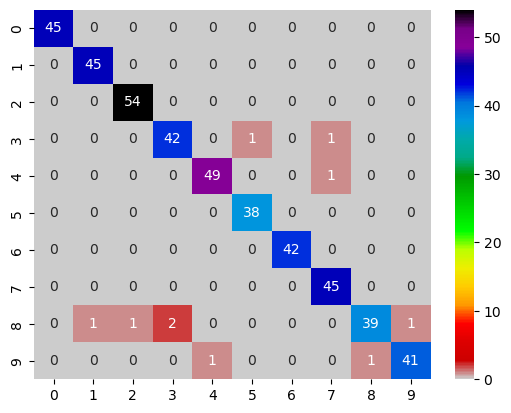

In [25]:
#Visualizing the confustion matrix
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))
import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [27]:
#K-Fold for cross-validation
#Contiuously training and testing with different portions of the dataset
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [ ]:
#These are the accuracy scores for the the folds

In [29]:
#find the mean accuracy
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 98.72%
Accuracy standard deviation: 0.75%


In [30]:
#Running Multiple models to find the best one
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

estimators ={'KNeighborsClassifier': knn, 'SVC': SVC(gamma='scale'), 'GaussianNB': GaussianNB()}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
                         X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [32]:
#Hyperparameter Tuning
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
